# Assignment 3

For this assignment I have analysed data from Mashable (www.mashable.com). Mashable is an online magazine that focuses on producing viral content. You may wonder: what makes an article go viral? That’s what you will be trying to find out! The data set consists of over 30,000 articles with associated variables such as the title length, the article category and the weekday on which it was published. For simplicity, some variables have been deleted from the original data file, which can be found on Kaggle (a platform for machine learning).

### Needed imports

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Data set

In [70]:
df = pd.read_csv('data.csv') #This loads an object with many fields, including a description
df = df.dropna() #Let's get rid of rows with empty cells, because they will trip up a lot of the analyses
df = df.drop(columns = ["shares"]) #not needed anymore since we have shares_log
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0,0.439379,0.082486,0.666667,0.375,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0,0.300454,0.027715,0.000000,0.000,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,1,0,0,0,0.575486,0.259120,0.000000,0.000,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,1,0,0,0,0,0.327220,0.134424,0.000000,0.000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0,0.507709,0.109256,0.000000,0.000,3.778151


## Selecting the variables

In [71]:
c = df.corr()
sorted(abs(c.shares_log)) # too see which correlations are the strongest
c.shares_log #The correlations with shares are strongest for data_channel_is_world, is_weekend, global_subjectivity, num_imgs, data_channel_is_socmed, data_channel_is_entertainment, weekday_is_saturday

id                              -0.003900
n_tokens_title                  -0.012247
n_tokens_content                 0.032897
num_imgs                         0.085575
num_videos                       0.037147
average_token_length            -0.031730
data_channel_is_lifestyle        0.036926
data_channel_is_entertainment   -0.080967
data_channel_is_bus             -0.033469
data_channel_is_socmed           0.085516
data_channel_is_tech             0.047729
data_channel_is_world           -0.141932
weekday_is_monday               -0.007843
weekday_is_tuesday              -0.027738
weekday_is_wednesday            -0.032125
weekday_is_thursday             -0.030329
weekday_is_friday                0.006309
weekday_is_saturday              0.072644
weekday_is_sunday                0.071864
is_weekend                       0.105919
global_subjectivity              0.093021
global_sentiment_polarity        0.053199
title_subjectivity               0.055161
title_sentiment_polarity         0

In [72]:
df_sel = df[["id", "data_channel_is_world", "data_channel_is_socmed", "data_channel_is_lifestyle", 
            "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_tech",
            "is_weekend", "global_subjectivity", "num_imgs", "weekday_is_monday", 
            "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", 
            "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", "shares_log"]]
df_sel

,id,data_channel_is_world,data_channel_is_socmed,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,num_imgs,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,shares_log
0,1,0,0,0,0,0,1,0,0.439379,12,0,1,0,0,0,0,0,3.322219
1,2,1,0,0,0,0,0,0,0.300454,6,1,0,0,0,0,0,0,2.437751
2,3,0,0,0,0,0,0,0,0.575486,0,0,0,0,0,1,0,0,3.176091
3,4,0,0,0,0,1,0,0,0.327220,2,0,0,0,1,0,0,0,3.301030
4,5,0,0,0,0,0,1,0,0.507709,18,0,1,0,0,0,0,0,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,0,0,0,0,0,1,0,0.448753,9,0,0,1,0,0,0,0,3.929419
24995,24996,0,0,0,0,1,0,0,0.418081,1,1,0,0,0,0,0,0,2.829304
24996,24997,0,0,0,1,0,0,1,0.486041,4,0,0,0,0,0,0,1,3.176091
24997,24998,0,0,0,0,0,1,0,0.627143,1,0,0,0,1,0,0,0,2.912222


### Splitting the dataset into a training and test set

In [80]:
y = df_sel['shares_log'] #We need to take out the rating as our Y-variable
X = df_sel.loc[:,'data_channel_is_world':'weekday_is_sunday'] #this slices the dataframe to include all the columns with highes correlation
X.index = df_sel["id"]
X.head()

,data_channel_is_world,data_channel_is_socmed,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,num_imgs,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0.439379,12,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0.300454,6,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0.575486,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0.327220,2,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0.507709,18,0,1,0,0,0,0,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,data_channel_is_world,data_channel_is_socmed,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,is_weekend,global_subjectivity,num_imgs,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
id,,,,,,,,,,,,,,,,
20922,0,0,0,0,0,0,1,0.451711,0,0,0,0,0,0,0,1
4486,0,0,0,0,0,0,0,0.476976,9,0,0,0,1,0,0,0
17756,0,0,0,0,1,0,0,0.488495,1,0,0,0,0,1,0,0
4705,0,0,0,0,0,0,0,0.545746,23,0,0,1,0,0,0,0
13494,0,0,0,0,0,0,0,0.507042,13,0,0,1,0,0,0,0


## Training a linear regression model to predict the number of shares, using exactly 5 variables

In [75]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [76]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-0.232266,data_channel_is_world
0.002742,data_channel_is_socmed
-0.066533,data_channel_is_lifestyle
-0.203776,data_channel_is_entertainment
-0.142029,data_channel_is_bus
-0.087934,data_channel_is_tech
0.069662,is_weekend
0.162746,global_subjectivity
0.002636,num_imgs
0.000509,weekday_is_monday


### An equation of the model

In [90]:
b0 = lm.intercept_ #gets the intercept
#b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
n = 1

print(f"The regression line is equal to y = {b0:.2f} + ", end ='')
for b in lm.coef_:
    if n == 16:
        print(f"({b:.2f}X_{n})", end ='')
    else:
        print(f"({b:.2f}X_{n}) + ", end ='')
    n+=1

The regression line is equal to y = 3.29 + (-0.23X_1) + (0.00X_2) + (-0.07X_3) + (-0.20X_4) + (-0.14X_5) + (-0.09X_6) + (0.07X_7) + (0.16X_8) + (0.00X_9) + (0.00X_10) + (-0.02X_11) + (-0.02X_12) + (-0.03X_13) + (0.01X_14) + (0.04X_15) + (0.03X_16)

$Y = 3.29 + (-0.23X_1) + (0.00X_2) + (-0.07X_3) + (-0.20X_4) + (-0.14X_5) + (-0.09X_6) + (0.07X_7) + (0.16X_8) + (0.00X_9) + (0.00X_{10}) + (-0.02X_{11}) + (-0.02X_{12}) + (-0.03X_{13}) + (0.01X_{14}) + (0.04X_{15}) + (0.03X_{16})$

## Evaluating the model on the test data

In [89]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.06090721407692812

The R^2 is 0.06, which means that only 6% of the variation is explained by the model.

In [78]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.3934722114514914

The RMSE is 0.39. Which means that we are typically about 0.39 off in our predicted rating 

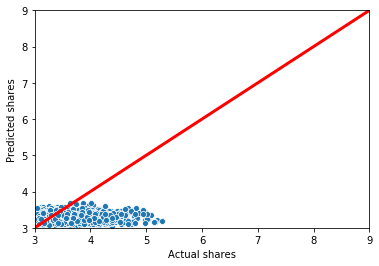

In [79]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()

In general the correlations between variables are really small and thus the model is very weak. The model works better for very small amount of shares and later on lowers the total predicted amount of shares in higher numbers.